#Part B: Neural Network Experiment
##By group 9: Jordan Moses, Andrew Wilson and Jake Sherman
###Date:11-25-2019
####Description: This notebook will go through various different examples of different Neural Networks for the purposes of practicing data anaylsis on text of reviews

#Prepare the enviornment
####Load all import statements

In [0]:
# Jupyter-specific.
%matplotlib inline

# General.

import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from io import StringIO
import io
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

#File uploaded and read into data object

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()

print(X.shape)
print(vectorizer.get_feature_names())

(14906, 24931)
['00', '000', '004', '008', '00am', '00pm', '01', '02', '03', '030', '0307347346', '03oz', '04', '040', '05', '05140', '056', '05oz', '06', '060', '0684800012', '06oz', '06sep12', '07', '070590080010', '08', '080', '0813819857', '09', '0943151201', '095', '099', '0f', '0g', '0g12', '0g13', '0g8', '0mg', '0z', '10', '100', '1000', '1000mg', '100cal', '100cals', '100g', '100mg', '100s', '100x', '101', '1017', '102', '104', '105', '1050', '108', '10_', '10a', '10days', '10g', '10lb', '10mg', '10min', '10mins', '10minutes', '10oz', '10th', '10x', '11', '110', '110lbs', '110mg', '111', '11164', '112g', '113', '1130', '115', '115mg', '118', '119', '11g', '11l', '11months', '11oz', '11th', '11x17', '12', '120', '1200', '120g', '124', '1240', '125', '125mg', '1266273814', '128', '128078', '129', '1291331352', '12g', '12lb', '12lbs', '12ounce', '12oz', '12pk', '12th', '12yr', '13', '130', '1300', '130mg', '131', '132', '1331447807', '1335229020', '134', '1344600644', '135', '135m

In [0]:
f = open("reduced_amazon_ff_reviews.csv")
data = pd.read_csv(f)
data.head()

In [0]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
for i in range(14906):
    y_encode = le.fit_transform(data['Rating'])



In [0]:
data.insert(loc = 0, column = 'label', value = y_encode)

In [0]:
y = data['label']
y.head()

0    1
1    2
2    2
3    0
4    2
Name: label, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Neural Network


##Creating a baseline Model
####We will use vectorizor and logistical regression in order to set a baseline model for our neural networks


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

#Vectorize the 'Text' data

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(data['Text'])
vectorizer.vocabulary_
vectorizer.transform(data['Text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.model_selection import train_test_split

data_amazon = data['Text']

sentences = data['Text'].values


sentences_train, sentences_test, y_train, y_test = train_test_split(  sentences, y, test_size=0.25, random_state=1000)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<11179x21986 sparse matrix of type '<class 'numpy.int64'>'
	with 639395 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.689026026294607


###Install Keras in case it isn't already in the enviornment

In [0]:
pip install keras

##Initial Model
####Go through and configure the inital mode

In [0]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [0]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                219870    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 219,881
Trainable params: 219,881
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3237
Testing Accuracy:  0.3263


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
history = model.fit(X_train, y_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(X_test, y_test),
...                     batch_size=10)

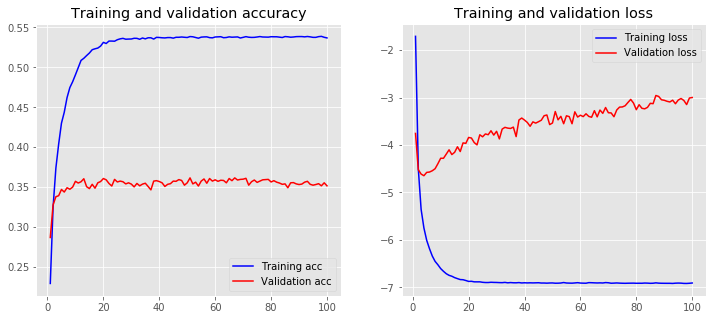

In [0]:
plot_history(history)

##Word Embedding
####Make sure tokenizer is imported and set max length of reviews and add zeros to the ends of short reviews

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

Using TensorFlow backend.


First Impression: The friendly folks over at "Exclusively Dog" heard about my website and sent me 5 of their products to test.<br />Let me just start off by saying that I Love how sweet all of these treats taste. Dad was/is considering trying one because they look and smell so much like human cookies. Plus the ingredients are very straight forward, they are probably healthier than most the stuff Mom eats... But there in lies the problem. Dad thinks that they are too sweet for a puppy of any age. The second ingredient in almost all of them is sugar. As we all know puppies have a hard time processing sugar, and just like humans can develop diabetes.<br /><br />Conclusion: Your puppy is nearly guaranteed to LOVE the taste. However these should only be used as an occasional treat! If you were to feed your puppies these sugary sweet morsels every day, they would soon plump up. If you puppy is already overweight or does not exercise regularly, you may want to think twice. On the PRO side the

In [0]:
vocab_size

23098

In [0]:
for word in ['the', 'all', 'happy', 'sad']:
     print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 41
happy: 350
sad: 1426


In [0]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 137  415  291   27  335   22   21   39  692    4  287    4   69    7
    1  122   22   21 1071   20   65   60   74  957   35  423 1113  192
   32    1   21    3   55  255   12   48   20   21   25    1  154    1
   92   25   73   18    1  150  261   83  256    8    1  129   92   12
   27    2   19   94  428    5   60   58   34   79  126  366   36    3
   84    5   60    1  150  261  452  515    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


##Embedding Layer
####Start adding in different layers to the model, here we will add word embedding and flatten

In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           1154900   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,204,921
Trainable params: 1,204,921
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5280
Testing Accuracy:  0.3440


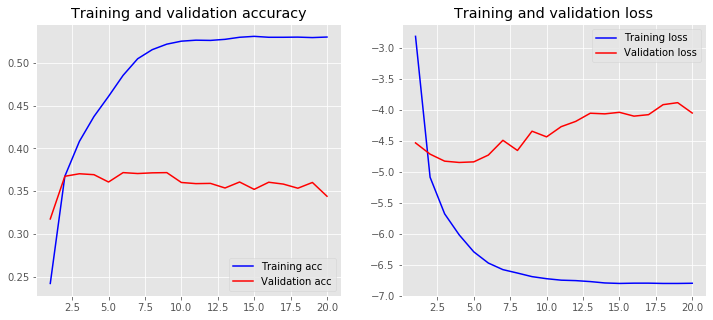

In [0]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

####Switch out flatter for GlobalMaxPool. Make sure all models are imported

In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1154900   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 1,155,421
Trainable params: 1,155,421
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5363
Testing Accuracy:  0.3394


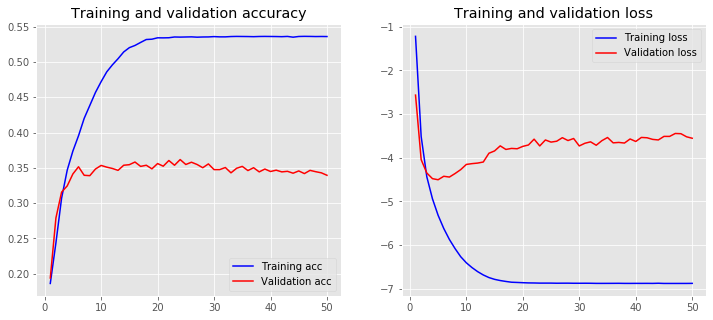

In [0]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

##Convolutional Neural Networks
####Begin practicing with CNN. Use the adam optimizer, binary cross entropy for loss metric and accuracy as the overall metric.

In [0]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2309800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,375,229
Trainable params: 2,375,229
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5305
Testing Accuracy:  0.3566


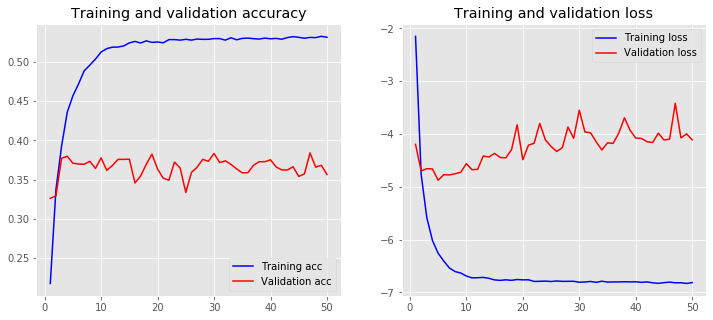

In [0]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)